In [145]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
from lib import util
from copy import deepcopy
%matplotlib inline
from lib import frame_util as futil
importlib.reload(futil)

<module 'lib.frame_util' from 'C:\\Users\\Alex Lin\\Documents\\CS229\\Project\\cs229_merging\\lib\\frame_util.py'>

In [ ]:

vidDict = futil.AddVxAx("res/101_trajectories/trajectories-0750am-0805am.txt", "res/101_trajectories/aug_trajectories-0750am-0805am.txt")

print(len(vidDict))


In [ ]:
util.dumpJSONDict("testDump.json", vidDict)

In [ ]:
util.dumpJSONDict("frameDict1.json", frameDict)

In [2]:
vidDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'vid')

In [4]:
frameDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'frame')

In [ ]:
vidDict = util.loadJSONDict("testDump.json")


In [ ]:
#[VID, FID, totalF, globaltime, localX, localY, globalX, globalY, \
#vehicleLength, vehicleWidth, vehicleClass, vVelocity, vAccel, laneID\
#precedingVID, followingVID, spacingFt, headwayFt]

KeyboardInterrupt: 

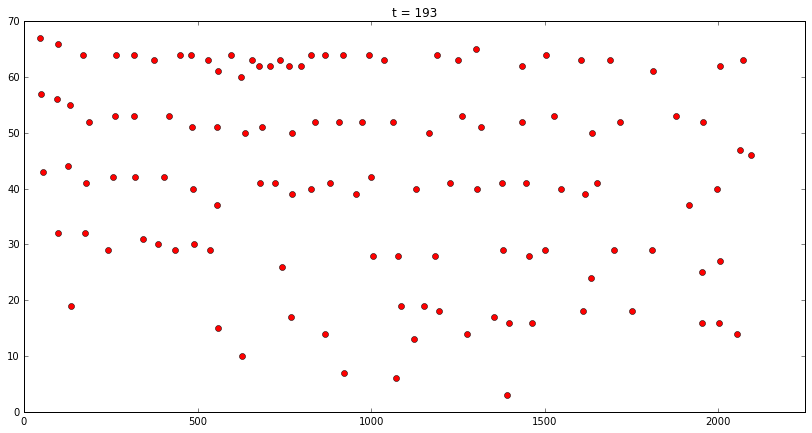

In [140]:
#With a loaded frameDict, animates frames.
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.figure(1)

for i in range(int(len(frameDict)/2)):
    curFrame = frameDict[100 + i*5]
    plotFrame(curFrame)
    plt.clf()


    

In [99]:
def plotFrame(curFrame):
    x,y = getFramePoints(curFrame)    
    plt.plot(y,70 - x, 'ro')
    plt.title("t = " + str(i))
    plt.axis([0, 2250, 0, 70])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #plt.show()


In [93]:
def getFramePoints(curFrame):
    x = np.array([0]*len(curFrame))
    y = np.array([0]*len(curFrame))
    entryCounter = 0
    for entry in curFrame:
        x[entryCounter] = float(curFrame[entry][4])
        y[entryCounter] = float(curFrame[entry][5])
        entryCounter += 1
    return x,y

In [56]:
from lib import vehicleclass as v
import importlib
importlib.reload(v)

<module 'lib.vehicleclass' from 'C:\\Users\\Alex Lin\\Documents\\CS229\\Project\\cs229_merging\\lib\\vehicleclass.py'>

In [110]:
MAX_X = 70
MAX_Y = 2250
X_DIV = 35
Y_DIV = 200
X_STEP = float(MAX_X/X_DIV)
Y_STEP = float(MAX_Y/Y_DIV)
def FrameToGrid(frame):
    #features = x, y, vx, vy, ax, ay
    grid = np.zeros((X_DIV + 2, Y_DIV + 2, 6))
    for vid in frame:
        vehicleData = frame[vid]
        veh = v.vehicle(vehicleData)
        gridX = int(veh.getX() / X_STEP)
        gridY = int(veh.getY() / Y_STEP)
        #print(veh.getX(), gridX, veh.getY(), gridY)
        grid[gridX][gridY] = veh.getTrajectory()
        #print(gridX, gridY)
    return grid

In [111]:
from lib import vehicleclass as v
import importlib
importlib.reload(v)
g = FrameToGrid(frameDict[150])

print(g.shape)
print(g)


(37, 202, 6)
[[[ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  ...,

In [112]:
def GetGridsFromFrameDict(frameDict):
    gridDict = {}
    for i in frameDict:
        frame = frameDict[i]
        grid = FrameToGrid(frame)
        gridDict[i] = deepcopy(grid)
    return gridDict

In [113]:
print(frameDict[13])

{2: array([  2.00000000e+00,   1.30000000e+01,   4.37000000e+02,
         1.11884698e+12,   1.64670000e+01,   3.53810000e+01,
         6.45113764e+06,   1.87334496e+06,   1.45000000e+01,
         4.90000000e+00,   2.00000000e+00,   4.00000000e+01,
         0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00]), 5: array([  5.00000000e+00,   1.30000000e+01,   4.52000000e+02,
         1.11884698e+12,   3.96850000e+01,   5.91540000e+01,
         6.45113626e+06,   1.87331176e+06,   1.70000000e+01,
         7.90000000e+00,   2.00000000e+00,   4.00000000e+01,
         0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -2.00000000e-01,   1.00000000e-01])}


In [114]:
gd = GetGridsFromFrameDict(frameDict)

In [115]:
print(len(gd))

9529


In [119]:
#print(gd[150])
print(np.sum(gd[150]))
print(gd[150].shape)

14750.544
(37, 202, 6)


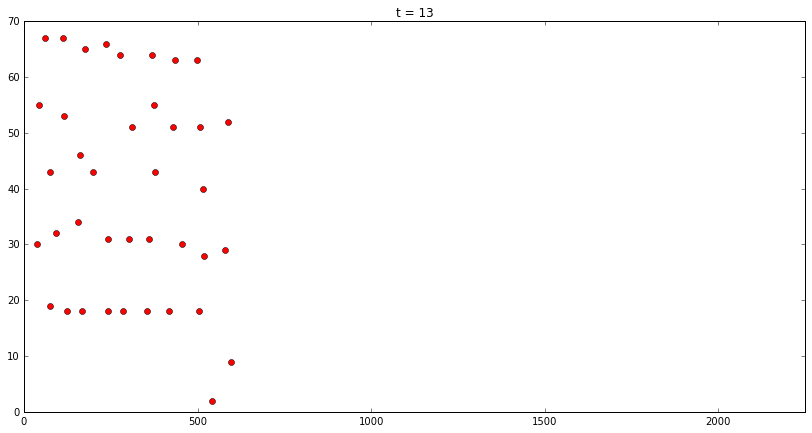

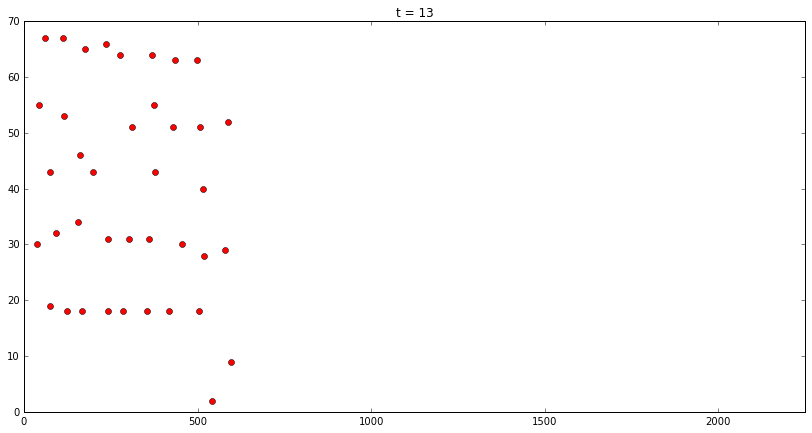

In [118]:
plotFrame(frameDict[150])

In [120]:
gflat = np.sum(gd[150], axis=2)

In [121]:
print(gflat.shape)

(37, 202)


In [123]:
gflat[gflat != 0]

array([ 105.043,  152.113,  222.394,  289.728,  321.586,  421.279,
        489.942,  571.896,   99.182,  436.37 ,  161.427,  360.417,
        491.896,  570.381,  634.668,  239.011,  138.966,  253.42 ,
        450.166,  591.692,  235.006,  158.631,  345.321,  397.789,
        448.15 ,  117.711,  536.008,  674.642,  603.743,  165.646,
        204.749,  252.784,  340.352,  363.978,  456.617,  506.735,
        592.043,  700.714,  648.348])

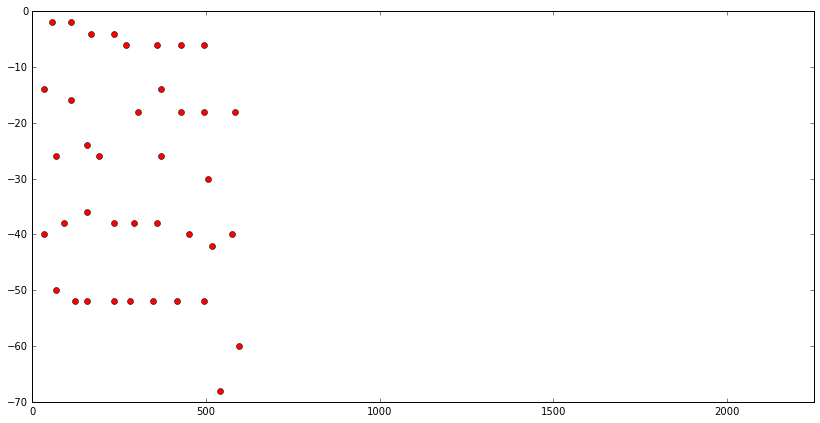

In [138]:
gflat = np.sum(grid, axis=2)
nz = np.nonzero(gflat)
nzx = nz[0]*X_STEP
nzy = nz[1]*Y_STEP
plt.axis([0, 2250, -70, 0])
plt.plot(nzy, -nzx, 'ro')
plt.show()


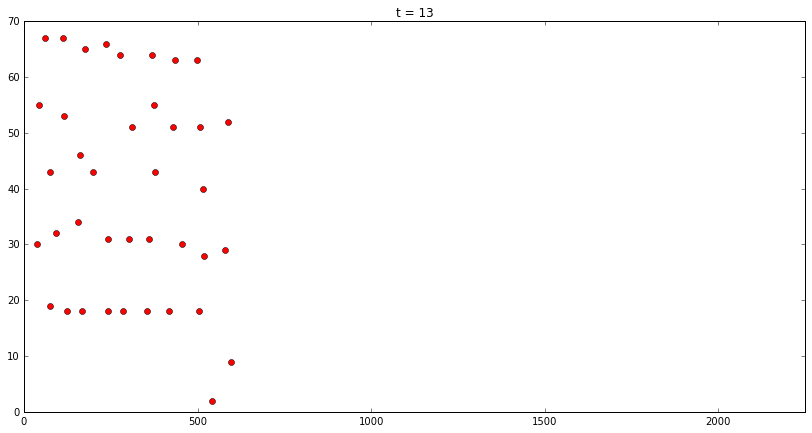

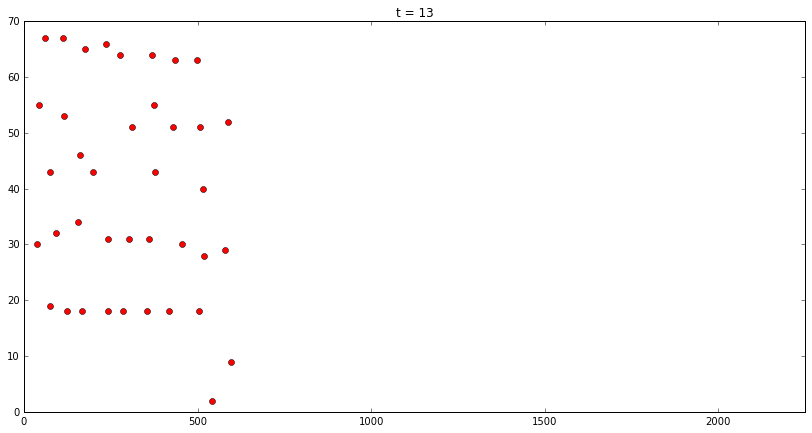

In [131]:
plotFrame(frameDict[150])

KeyboardInterrupt: 

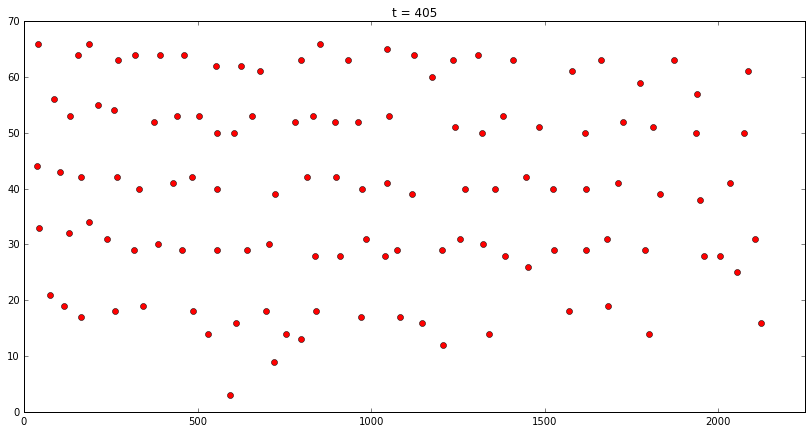

In [152]:
from lib import frame_util as futil
importlib.reload(futil)
futil.AnimateFrames(frameDict)